# Visualising Distributions of Data



We will start using the ```seaborn``` library for data visualisation. Seaborn is a python library built on top of ```matplotlib```. It creates much more attractive plots than ```matplotlib```, and is often more concise than ```matplotlib``` when you want to customize your plots, add colors, grids etc.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

# data
df = pd.read_csv("4.3Market Fact.csv")
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Histograms and Density Plots

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. 

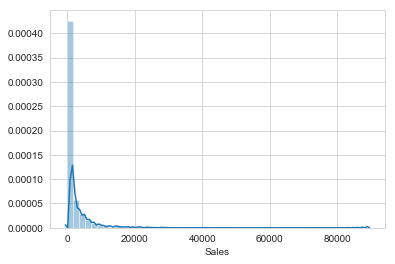

In [3]:
# simple density plot
sns.distplot(df['Sales'])
plt.show()

Simple density plot (without the histogram bars) can be created by specifying ```hist=False```.

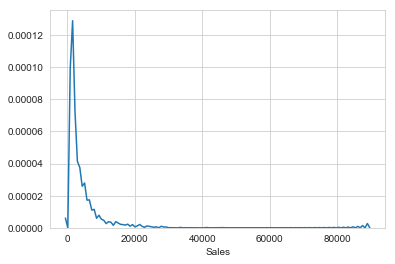

In [4]:
sns.distplot(df['Sales'], hist=False)
plt.show()

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.

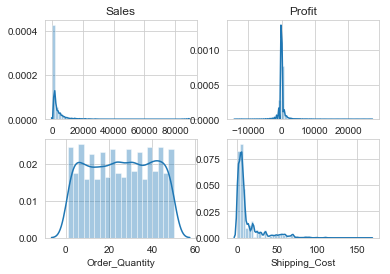

In [5]:
# subplots

# subplot 1
plt.subplot(2, 2, 1)
plt.title('Sales')
sns.distplot(df['Sales'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Profit')
sns.distplot(df['Profit'])

# subplot 3
plt.subplot(2, 2, 3)
# plt.title('Order Quantity')
sns.distplot(df['Order_Quantity'])

# subplot 4
plt.subplot(2, 2, 4)
# plt.title('Shipping Cost')
sns.distplot(df['Shipping_Cost'])

plt.show()


### Boxplots

Boxplots are a great way to visualise univariate data because they represent statistics such as the 25th percentile, 50th percentile, etc.

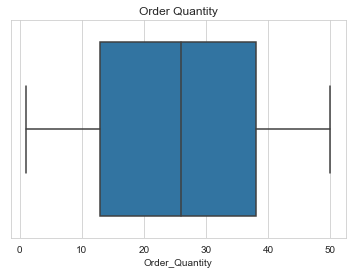

In [6]:
# boxplot
sns.boxplot(df['Order_Quantity'])
plt.title('Order Quantity')

plt.show()

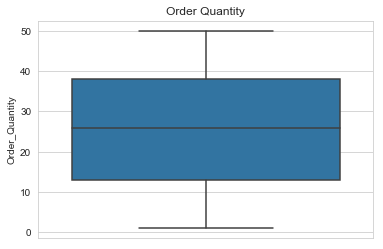

In [7]:
# to plot the values on the vertical axis, specify y=variable
sns.boxplot(y=df['Order_Quantity'])
plt.title('Order Quantity')

plt.show()

## Plotting Pairwise Relationships

You'll find it helpful to plot pairwise relationships between multiple numeric variables. 

In [8]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['Price']=boston.target

### Pairwise Scatter Plots

Now, since we have multiple numeric variables, ```sns.pairplot()``` is a good choice to plot all of them in one figure.

<Figure size 720x576 with 0 Axes>

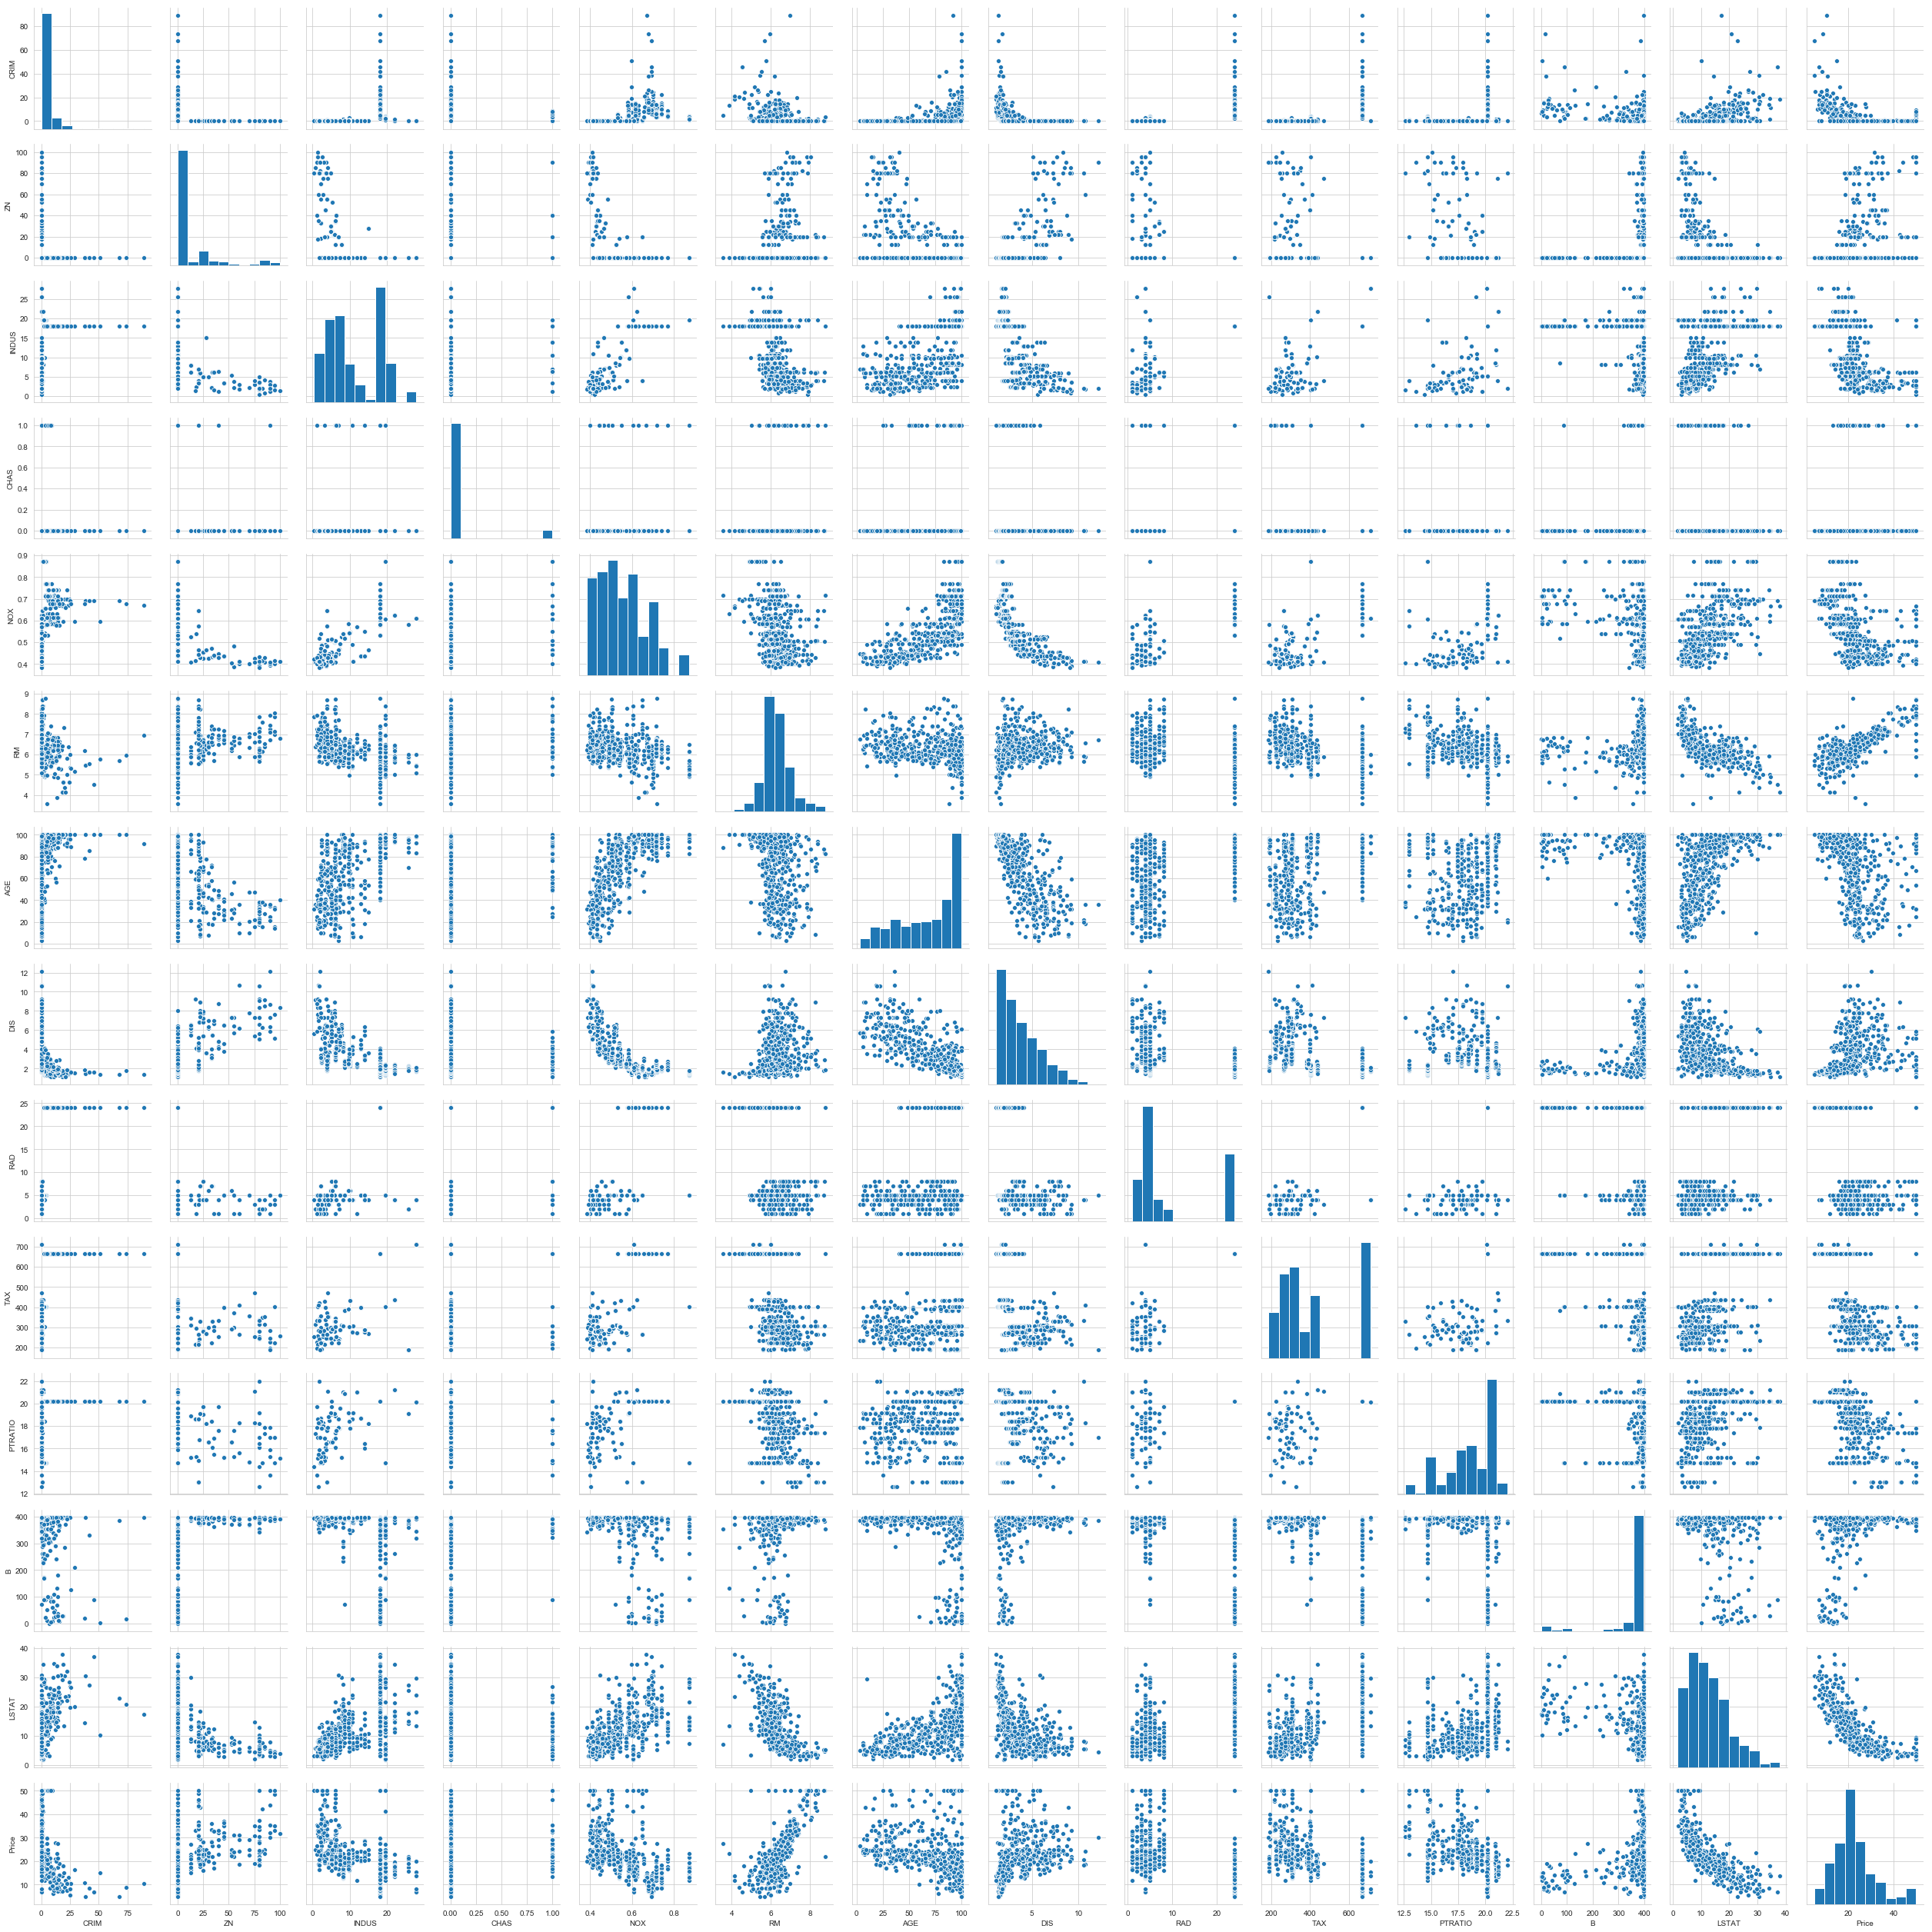

In [ ]:
# pairplot
plt.figure(figsize=(10,8))
sns.pairplot(df_boston)
plt.show()

In [ ]:
df_new = df_boston[['RM','B','LSTAT','Price']]

In [ ]:
df_new.shape

(506, 4)

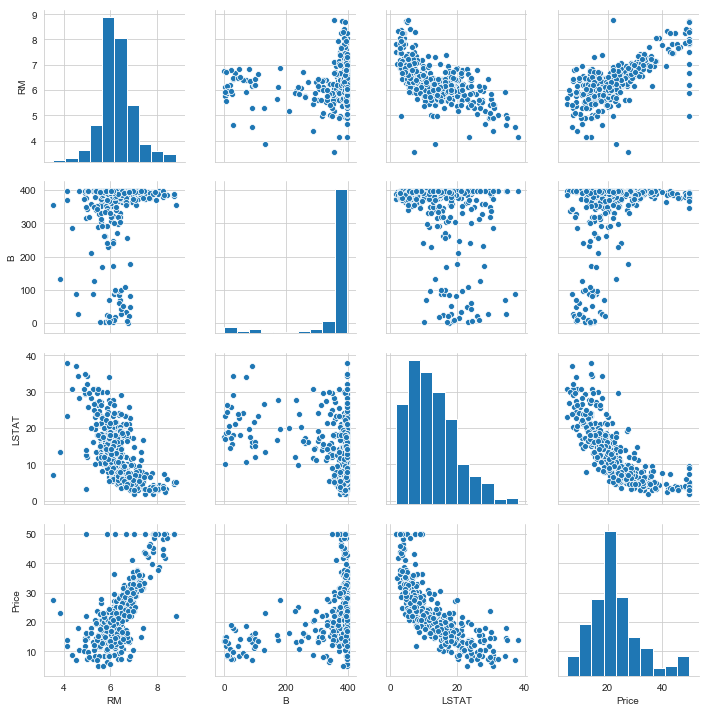

In [ ]:
sns.pairplot(df_new)
plt.show()

In [ ]:
# You can also observe the correlation between the features
# using df.corr()
cor = df_boston.corr()
round(cor, 3)
#cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


The dataframe above is a **correlation matrix** of housing dataset. Try finding some important relationships between features. 

## Heatmaps

It will be helpful to visualise the correlation matrix itself using ```sns.heatmap()```.

In [ ]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="cool", annot=True)
plt.show()